In [239]:
from ipynb.fs.full.gbs import *

In [240]:
from functools import cache
from collections import Counter
from typing import Tuple # TODO: See pbs. Should we add type annotations?

import math
import numpy as np
from numpy import sqrt, exp, cos, sin, cosh, sinh, conj
from numpy.polynomial import Polynomial as P
from numpy.linalg import qr
from permanent import permanent

import matplotlib.pyplot as plt
import mpl_scatter_density  # noqa
from matplotlib.offsetbox import AnchoredText

plt.style.use('seaborn')

In [241]:
from scipy.stats import norm

distr = norm()
reals = distr.rvs(size=(50,100))
imags = distr.rvs(size=(50,100))
print(reals + 1j * imags)

[[0.208+0.275j -0.924+1.152j 0.310+0.843j ... 0.839-2.994j 1.109+0.007j
  0.669+1.413j]
 [-0.625-0.749j 0.061-1.977j 0.749+0.934j ... -0.270+2.698j 0.177-0.449j
  0.601+1.532j]
 [-2.183+0.378j 1.412+1.140j -0.577-0.940j ... 3.828-0.840j 0.925+1.124j
  -1.180-0.023j]
 ...
 [0.229+1.750j -0.546+1.478j 1.307+0.189j ... 1.097+0.848j 0.071-0.981j
  -0.626+2.011j]
 [-0.545+1.223j 0.575-0.571j 0.260+0.320j ... 0.180+1.384j 0.218+0.254j
  -1.528-1.439j]
 [0.040-0.504j -0.176+1.044j 0.384+0.484j ... 1.396+0.370j -0.056+0.749j
  0.400+1.118j]]


In [242]:
arr = zpf(1000, 2, 1)
# %timeit np.trace(arr.T @ arr) 
# %timeit np.trace(arr @ arr.T)
# %timeit np.trace((arr @ arr.T if arr.shape[0] < arr.shape[1] else arr.T @ arr)) # fastest
print(np.trace(arr.T @ arr), np.trace(arr @ arr.T))

# Output:
# 10.1 ms ± 2.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
# 15 µs ± 1.97 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
# 12.7 µs ± 295 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)

(-3.134142735802344-8.779702851736808j) (-3.134142735802442-8.779702851736822j)


In [243]:
print(np.eye(2) * np.ones((2,2)))           # elementwise product
print(np.eye(2) @ np.ones((2,2)))           # matrix product
print(np.kron(np.eye(2), np.ones((2,2))))   # kronecker product

[[1. 0.]
 [0. 1.]]
[[1. 1.]
 [1. 1.]]
[[1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [0. 0. 1. 1.]
 [0. 0. 1. 1.]]


/home/ronakr/installations/anaconda3/envs/ronakr/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:77: RuntimeWarning: All-NaN slice encountered
  vmin = self._density_vmin(array)
/home/ronakr/installations/anaconda3/envs/ronakr/lib/python3.10/site-packages/mpl_scatter_density/generic_density_artist.py:82: RuntimeWarning: All-NaN slice encountered
  vmax = self._density_vmax(array)


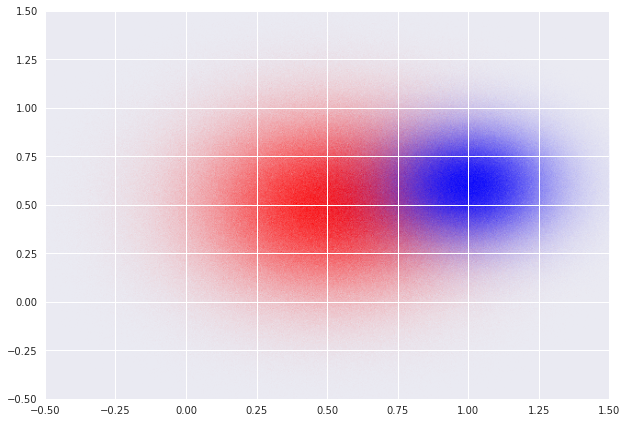

In [244]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

n = 10000000

x = np.random.normal(0.5, 0.3, n)
y = np.random.normal(0.5, 0.3, n)

ax.scatter_density(x, y, color='red')

x = np.random.normal(1.0, 0.2, n)
y = np.random.normal(0.6, 0.2, n)

ax.scatter_density(x, y, color='blue')

ax.set_xlim(-0.5, 1.5)
ax.set_ylim(-0.5, 1.5)

fig.savefig('double.png')

In [245]:
def plot_scatter(x, y, color='blue', savefile=False, poly_regr_deg=None):

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')

    ax.scatter_density(x, y, color=color)

    if poly_regr_deg:
        p = P.fit(x, y, poly_regr_deg, window=[np.min(x), np.max(x)])
        xx, yy = p.linspace()
        ax.plot(xx, yy, lw=2)
        at = AnchoredText(
            str(p), prop=dict(size=15), frameon=True, loc='upper left')
        at.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
        ax.add_artist(at)
    
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(y), np.max(y))

    if savefile:
        fig.savefig(savefile)

In [246]:
def plot_complex(arr, **kwargs):
    plot_scatter(np.real(arr), np.imag(arr), **kwargs)

In [247]:
a,b = ent(N=1000000, r=1, t=2, phase=0)

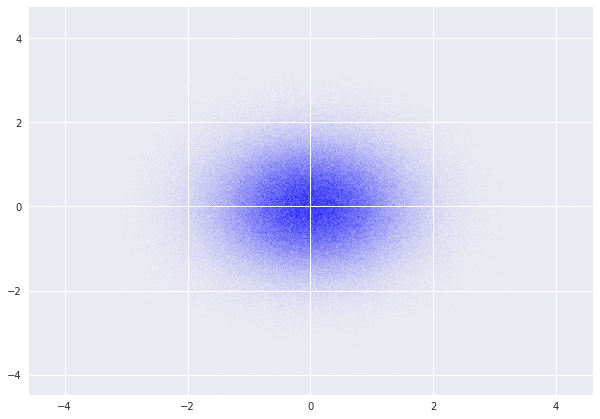

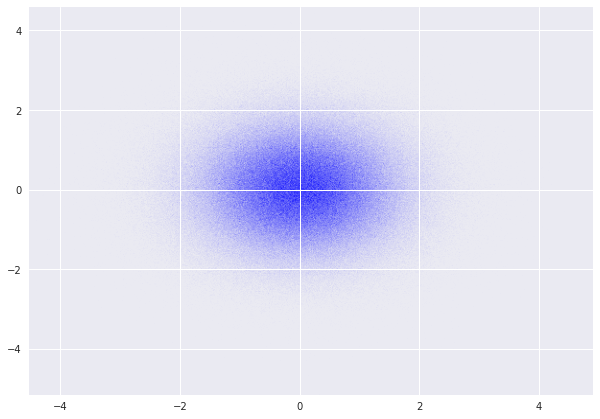

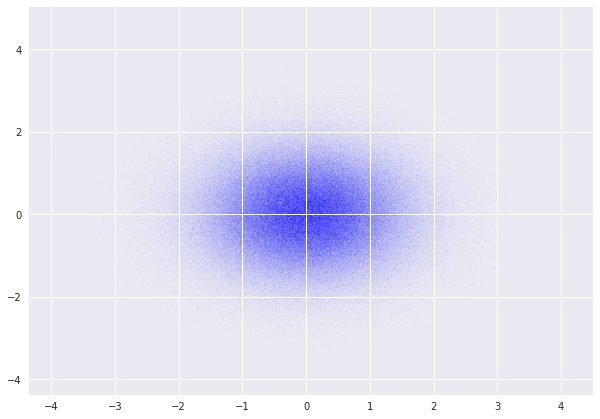

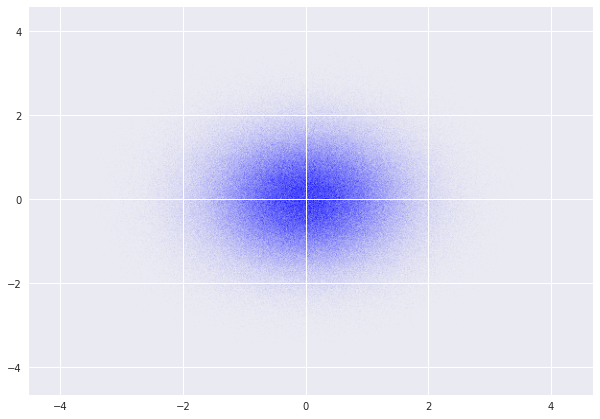

In [248]:
plot_complex(a[0,:])
plot_complex(a[1,:])
plot_complex(b[0,:])
plot_complex(b[1,:])

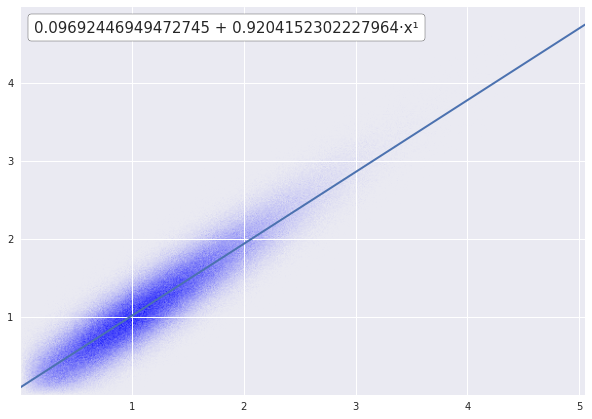

In [249]:
x = np.abs(a[0,:])
y = np.abs(b[1,:])

plot_scatter(x, y, poly_regr_deg=1, savefile='hv_vh_entangled.png')

In [250]:
print(p)
print(p(0))
print(xx[:10])
print(yy[:10])
print(p(xx[:10]))

0.09793950376783743 + 0.9196860063005649·x¹
0.09793950376783743
[0.00188748 0.05625186 0.11061625 0.16498064 0.21934502 0.27370941
 0.3280738  0.38243818 0.43680257 0.49116696]
[0.09967539 0.14967356 0.19967172 0.24966989 0.29966805 0.34966622
 0.39966438 0.44966255 0.49966072 0.54965888]
[0.09967539 0.14967356 0.19967172 0.24966989 0.29966805 0.34966622
 0.39966438 0.44966255 0.49966072 0.54965888]


In [251]:
print(p)
print(p(0))
print(p(1)-p(0))
print(p(2)-p(1))

0.09793950376783743 + 0.9196860063005649·x¹
0.09793950376783743
0.9196860063005647
0.919686006300565


In [252]:
a,b = ent(N=1000000, r=1, t=2, phase=0)
np.set_printoptions(formatter={'complex_kind': '{:.3f}'.format})
#print(np.cov(a,b),2)
print(np.corrcoef(a,b))
#print(np.cov(a[0,:],b[0,:]))
print(np.corrcoef(a[0,:],b[0,:]))
#print(np.cov(a[0,:],b[1,:]))
print(np.corrcoef(a[0,:],b[1,:]))
#print(np.cov(a[1,:],b[0,:]))
print(np.corrcoef(a[1,:],b[0,:]))
#print(np.cov(a[1,:],b[1,:]))
print(np.corrcoef(a[1,:],b[1,:]))

# 0.5, 1.88, 13.66, 100.9, 745.66, 5501
# plot_scatter(np.linspace(0,5,6), [0.5, 1.88, 13.66, 100.9, 745.66, 5501], poly_regr_deg=5)


[[1.000+0.000j -0.000-0.001j -0.002+0.000j 0.001+0.002j]
 [-0.000+0.001j 1.000+0.000j 0.001+0.000j -0.002+0.000j]
 [-0.002-0.000j 0.001-0.000j 1.000+0.000j -0.000-0.001j]
 [0.001-0.002j -0.002-0.000j -0.000+0.001j 1.000+0.000j]]
[[1.000+0.000j -0.002+0.000j]
 [-0.002-0.000j 1.000+0.000j]]
[[1.000+0.000j 0.001+0.002j]
 [0.001-0.002j 1.000+0.000j]]
[[1.000+0.000j 0.001+0.000j]
 [0.001-0.000j 1.000+0.000j]]
[[1.000+0.000j -0.002+0.000j]
 [-0.002-0.000j 1.000+0.000j]]
